In [1]:
# load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

E:\ANACONDA\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Display all the columns of the dataframe
pd.options.display.max_columns = None

# load train & test data set
train_main = pd.read_csv('train.csv')
test_main = pd.read_csv('test.csv')
train_main.columns
test_main.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'],
      dtype='object')

In [5]:
train_main.head(3)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40


In [6]:
train_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

Missing Value check

In [7]:
missing_train1 = train_main.isnull().sum()
missing_train2 = train_main.isnull().sum()/len(train_main)
missing_train3 = pd.concat([missing_train1, missing_train2],axis = 1)
missing_train3 = missing_train3.rename(columns={0:'Missing_values',1: 'Missing_Values_Dis'})
missing_train3

missing_test1 = train_main.isnull().sum()
missing_test2 = train_main.isnull().sum()/len(train_main)
missing_test3 = pd.concat([missing_test1, missing_test2],axis = 1)
missing_test3 = missing_test3.rename(columns={0:'Missing_values',1: 'Missing_Values_Dis'})
missing_test3

,Missing_values,Missing_Values_Dis
case_id,0,0.000000
Hospital_code,0,0.000000
Hospital_type_code,0,0.000000
City_Code_Hospital,0,0.000000
Hospital_region_code,0,0.000000
Available Extra Rooms in Hospital,0,0.000000
Department,0,0.000000
Ward_Type,0,0.000000
Ward_Facility_Code,0,0.000000
Bed Grade,113,0.000355


,Missing_values,Missing_Values_Dis
case_id,0,0.000000
Hospital_code,0,0.000000
Hospital_type_code,0,0.000000
City_Code_Hospital,0,0.000000
Hospital_region_code,0,0.000000
Available Extra Rooms in Hospital,0,0.000000
Department,0,0.000000
Ward_Type,0,0.000000
Ward_Facility_Code,0,0.000000
Bed Grade,113,0.000355


In [8]:
train_main['Bed Grade'] = train_main['Bed Grade'].astype(float)
train_main['City_Code_Patient'] = train_main['City_Code_Patient'].astype(float)

In [9]:
train_main.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [10]:
train_main.columns[train_main.isnull().any()]

Index(['Bed Grade', 'City_Code_Patient'], dtype='object')

In [11]:
train_main['Hospital_code'] = train_main['Hospital_code'].astype(str)
# train_main['Bed Grade'] = train_main['Bed Grade'].astype(str)
# train_main['City_Code_Patient'] = train_main['City_Code_Patient'].astype(str)
train_main['Available Extra Rooms in Hospital'] = train_main['Available Extra Rooms in Hospital'].astype(str)
train_main['City_Code_Hospital'] = train_main['City_Code_Hospital'].astype(str)

test_main['Hospital_code'] = test_main['Hospital_code'].astype(str)
test_main['Bed Grade'] = test_main['Bed Grade'].astype(str)
# test_main['City_Code_Patient'] = test_main['City_Code_Patient'].astype(str)
test_main['Available Extra Rooms in Hospital'] = test_main['Available Extra Rooms in Hospital'].astype(str)
test_main['City_Code_Hospital'] = test_main['City_Code_Hospital'].astype(str)

### Missing Value Imputation 
-- KNN Imputer

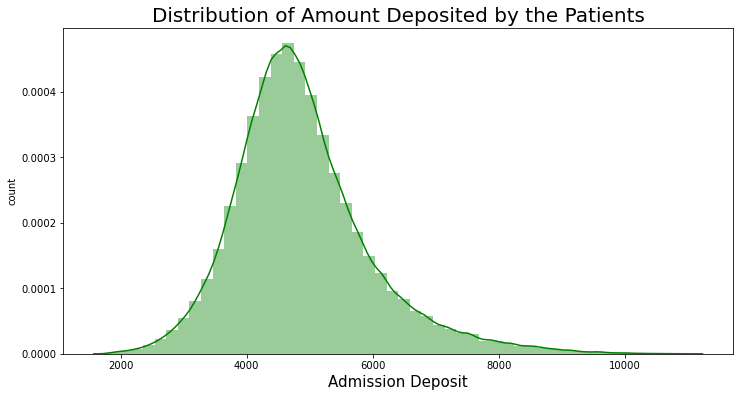

In [12]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.distplot(train_main['Admission_Deposit'], color = 'green')
plt.title('Distribution of Amount Deposited by the Patients', fontsize = 20)
plt.xlabel('Admission Deposit', fontsize = 15)
plt.ylabel('count')
plt.show();

<AxesSubplot:xlabel='Admission_Deposit'>

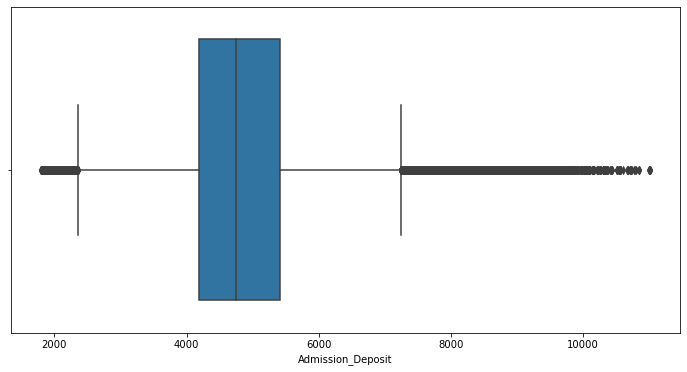

In [13]:
sns.boxplot(x =  train_main['Admission_Deposit'])

<AxesSubplot:xlabel='Admission_Deposit', ylabel='Stay'>

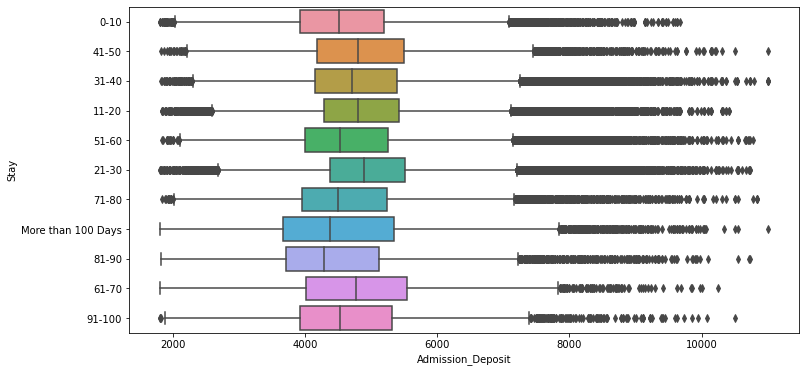

In [14]:
# a,b=plt.subplots(2,2,figsize=(8,10))
sns.boxplot(train_main['Admission_Deposit'],train_main['Stay'])
# sns.boxplot(df['Hospital_type_code'],df['Stay'],ax=b[0,1])

In [15]:
def bin_var(var1):
  if var1 >= 1800 and var1 <=3000:
    return '1800-3000'
  elif var1 > 3000 and var1 <= 4000:
    return '3000-4000'
  elif var1 > 4000 and var1 <= 5000:
    return '4000-5000'
  elif var1 > 5000 and var1 <= 7000:
    return '5000-7000'
  elif var1 > 7000 and var1 <= 9000:
    return '7000-9000'
  else:
    return '>9000'
train_main['Admission_Deposit1']  = train_main[['Admission_Deposit']].apply(lambda x: bin_var(x['Admission_Deposit']),axis=1)
test_main['Admission_Deposit1']  = test_main[['Admission_Deposit']].apply(lambda x: bin_var(x['Admission_Deposit']),axis=1)

In [16]:
def bin_var(var1):
  if var1 >= 0 and var1 <= 2:
    return '0-2'
  elif var1 > 2 and var1 <= 3:
    return '2-3'
  elif var1 > 3 and var1 <= 4:
    return '3-4'
  elif var1 > 4 and var1 <= 5:
    return '4-5'
  elif var1 > 5 and var1 <= 6:
    return '5-6'
  else:
    return '>7'
train_main['Visitors_with_Patient']  = train_main[['Visitors with Patient']].apply(lambda x: bin_var(x['Visitors with Patient']),axis=1)
test_main['Visitors_with_Patient']  = test_main[['Visitors with Patient']].apply(lambda x: bin_var(x['Visitors with Patient']),axis=1)

In [17]:
# train_main['Admission_Deposit1'] = pd.qcut(train_main['Admission_Deposit'],4)
train_main['Admission_Deposit1'].value_counts()
train_main['Visitors_with_Patient'].value_counts()

4000-5000    136878
5000-7000    108424
3000-4000     51877
7000-9000     13524
1800-3000      6581
>9000          1154
Name: Admission_Deposit1, dtype: int64

0-2    139646
3-4     79225
2-3     59180
5-6     18860
>7      12308
4-5      9219
Name: Visitors_with_Patient, dtype: int64

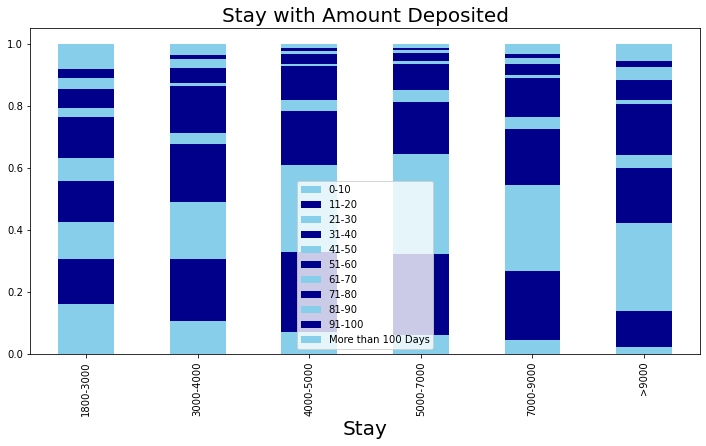

In [18]:
data = pd.crosstab(train_main['Admission_Deposit1'],train_main['Stay'])
data.div(data.sum(1).astype('float'),axis = 0).plot(kind = 'bar', stacked = True, figsize = (12, 6), color = ['skyblue', 'darkblue'])
plt.title('Stay with Amount Deposited', fontsize = 20)
plt.xlabel('Stay', fontsize = 20)
plt.legend()
plt.show();

In [19]:
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.base import TransformerMixin

In [20]:
# imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
imputer_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_knn = KNNImputer()
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [21]:
train_main['Bed Grade'] = imputer_knn.fit_transform(train_main.loc[:,['Bed Grade']])
train_main['City_Code_Patient'] = imputer_knn.fit_transform(train_main[['City_Code_Patient']])

test_main['Bed Grade'] = imputer_knn.fit_transform(test_main.loc[:,['Bed Grade']])
test_main['City_Code_Patient'] = imputer_knn.fit_transform(test_main[['City_Code_Patient']])

In [22]:
train_main = train_main.drop(columns= {'Visitors with Patient','Admission_Deposit'},axis=1)
test_main = test_main.drop(columns= {'Visitors with Patient','Admission_Deposit'},axis=1)

### Label & One Hot Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
train_main.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Age', 'Stay', 'Admission_Deposit1',
       'Visitors_with_Patient'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_main['Stay']=encoder.fit_transform(train_main['Stay'])

In [28]:
train_main.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Age', 'Stay', 'Admission_Deposit1',
       'Visitors_with_Patient'],
      dtype='object')

In [29]:
train_main_Id = train_main[['case_id','patientid']]
test_main_Id = test_main[['case_id','patientid']]

train_main = train_main.drop(columns={'case_id','patientid'},axis = 1)
test_main = test_main.drop(columns={'case_id','patientid'},axis = 1)

In [30]:
columns = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'City_Code_Patient', 'Type of Admission','Severity of Illness','Age']

In [32]:
# Train Data
train_main['Hospital_code']=le.fit_transform(train_main['Hospital_code'])
train_main['Hospital_type_code']=le.fit_transform(train_main['Hospital_type_code'])
train_main['City_Code_Hospital']=le.fit_transform(train_main['City_Code_Hospital'])
train_main['Hospital_region_code']=le.fit_transform(train_main['Hospital_region_code'])
train_main['Available Extra Rooms in Hospital']=le.fit_transform(train_main['Available Extra Rooms in Hospital'])
train_main['Department']=le.fit_transform(train_main['Department'])
train_main['Ward_Type']=le.fit_transform(train_main['Ward_Type'])
train_main['Ward_Facility_Code']=le.fit_transform(train_main['Ward_Facility_Code'])
train_main['Bed Grade']=le.fit_transform(train_main['Bed Grade'])
train_main['City_Code_Patient']=le.fit_transform(train_main['City_Code_Patient'])
train_main['Type of Admission']=le.fit_transform(train_main['Type of Admission'])
train_main['Severity of Illness']=le.fit_transform(train_main['Severity of Illness'])
train_main['Age']=le.fit_transform(train_main['Age'])
train_main['Admission_Deposit1']=le.fit_transform(train_main['Admission_Deposit1'])
train_main['Visitors_with_Patient']=le.fit_transform(train_main['Visitors_with_Patient'])

# Test Data
test_main['Hospital_code']=le.fit_transform(test_main['Hospital_code'])
test_main['Hospital_type_code']=le.fit_transform(test_main['Hospital_type_code'])
test_main['City_Code_Hospital']=le.fit_transform(test_main['City_Code_Hospital'])
test_main['Hospital_region_code']=le.fit_transform(test_main['Hospital_region_code'])
test_main['Available Extra Rooms in Hospital']=le.fit_transform(test_main['Available Extra Rooms in Hospital'])
test_main['Department']=le.fit_transform(test_main['Department'])
test_main['Ward_Type']=le.fit_transform(test_main['Ward_Type'])
test_main['Ward_Facility_Code']=le.fit_transform(test_main['Ward_Facility_Code'])
test_main['Bed Grade']=le.fit_transform(test_main['Bed Grade'])
test_main['City_Code_Patient']=le.fit_transform(test_main['City_Code_Patient'])
test_main['Type of Admission']=le.fit_transform(test_main['Type of Admission'])
test_main['Severity of Illness']=le.fit_transform(test_main['Severity of Illness'])
test_main['Age']=le.fit_transform(test_main['Age'])
test_main['Admission_Deposit1']=le.fit_transform(test_main['Admission_Deposit1'])
test_main['Visitors_with_Patient']=le.fit_transform(test_main['Visitors_with_Patient'])

In [33]:
train_main.head(2)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay,Admission_Deposit1,Visitors_with_Patient
0,30,2,5,2,11,3,2,5,1,6,0,0,5,0,2,0
1,11,2,7,2,7,3,3,5,1,6,1,0,5,4,3,0


## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score

In [35]:
train_main['Stay'].value_counts(normalize=True)*100# Imbalanced dataset

2     27.475050
1     24.538215
3     17.321739
5     10.996803
0      7.412432
4      3.687688
7      3.220093
10     2.098682
8      1.519291
9      0.868301
6      0.861706
Name: Stay, dtype: float64

In [36]:
X = train_main.drop('Stay',1)
y = train_main['Stay']
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state =1)

In [37]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

# CatBoost Classifier

In [39]:
cat = CatBoostClassifier(custom_metric=['Accuracy'], learning_rate=0.03, n_estimators=200, verbose = False)

In [41]:
cat.fit(X_train, y_train,eval_set=(X_valid, y_valid), verbose=10)   

0:	learn: 2.3446426	test: 2.3447881	best: 2.3447881 (0)	total: 862ms	remaining: 2m 51s
10:	learn: 2.0222391	test: 2.0231532	best: 2.0231532 (10)	total: 8.52s	remaining: 2m 26s
20:	learn: 1.8616607	test: 1.8631288	best: 1.8631288 (20)	total: 16.7s	remaining: 2m 22s
30:	learn: 1.7648231	test: 1.7667605	best: 1.7667605 (30)	total: 24.5s	remaining: 2m 13s
40:	learn: 1.7038386	test: 1.7061196	best: 1.7061196 (40)	total: 32.1s	remaining: 2m 4s
50:	learn: 1.6625733	test: 1.6652381	best: 1.6652381 (50)	total: 40.1s	remaining: 1m 57s
60:	learn: 1.6339062	test: 1.6368553	best: 1.6368553 (60)	total: 47.7s	remaining: 1m 48s
70:	learn: 1.6150244	test: 1.6183675	best: 1.6183675 (70)	total: 55.2s	remaining: 1m 40s
80:	learn: 1.6011036	test: 1.6048606	best: 1.6048606 (80)	total: 1m 2s	remaining: 1m 32s
90:	learn: 1.5908167	test: 1.5950263	best: 1.5950263 (90)	total: 1m 10s	remaining: 1m 24s
100:	learn: 1.5834251	test: 1.5879713	best: 1.5879713 (100)	total: 1m 18s	remaining: 1m 16s
110:	learn: 1.577125

In [42]:
# 4. Get the Best Score of 'auc'
print(cat.get_best_score())

{'learn': {'Accuracy': 0.4125888125613346, 'MultiClass': 1.5469700119424932}, 'validation': {'Accuracy': 0.40833438010300216, 'MultiClass': 1.5549602086797627}}


In [43]:
# 3. Predict the Probability Values of Target "Outcome" for "test" data :
cat_pred_valid = cat.predict(X_valid)
cat_pred_valid_prob = cat.predict_proba(X_valid)

# Test Data
cat_pred_test = cat.predict(test_main)
cat_pred__test_prob = cat.predict_proba(test_main)

In [45]:
cat1 = CatBoostClassifier(custom_metric=['Accuracy'], learning_rate=0.15, random_seed=50, max_depth = 5,n_estimators=500, verbose = False)

In [46]:
cat1.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=50)

0:	learn: 2.1559727	test: 2.1559925	best: 2.1559925 (0)	total: 523ms	remaining: 4m 20s
50:	learn: 1.5498955	test: 1.5565820	best: 1.5565820 (50)	total: 21.1s	remaining: 3m 6s
100:	learn: 1.5249339	test: 1.5363623	best: 1.5363623 (100)	total: 41s	remaining: 2m 41s
150:	learn: 1.5105461	test: 1.5260515	best: 1.5260515 (150)	total: 1m	remaining: 2m 20s
200:	learn: 1.5014096	test: 1.5209473	best: 1.5209473 (200)	total: 1m 20s	remaining: 1m 59s
250:	learn: 1.4940656	test: 1.5177360	best: 1.5177360 (250)	total: 1m 40s	remaining: 1m 39s
300:	learn: 1.4876472	test: 1.5151227	best: 1.5151227 (300)	total: 1m 59s	remaining: 1m 19s
350:	learn: 1.4824422	test: 1.5137051	best: 1.5137051 (350)	total: 2m 19s	remaining: 59.3s
400:	learn: 1.4781925	test: 1.5129079	best: 1.5129012 (398)	total: 2m 39s	remaining: 39.3s
450:	learn: 1.4739589	test: 1.5120137	best: 1.5120137 (450)	total: 2m 58s	remaining: 19.4s
499:	learn: 1.4696833	test: 1.5113449	best: 1.5113370 (495)	total: 3m 17s	remaining: 0us

bestTest 

In [47]:
print(cat1.get_best_score())

{'learn': {'Accuracy': 0.43694995093228656, 'MultiClass': 1.469683316696342}, 'validation': {'Accuracy': 0.42075430222333876, 'MultiClass': 1.5113370412736518}}


# Light GBM

In [48]:
import lightgbm as lgb

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
lgbmc=lgb.LGBMClassifier(random_state=1)

lgbmc.fit(X_train,y_train)


y_train_pred=lgbmc.predict(X_train)
print("Accuracy of train:",accuracy_score(y_train,y_train_pred))

y_test_pred=lgbmc.predict(X_valid)
print("Accuracy of test:",accuracy_score(y_valid,y_test_pred))

LGBMClassifier(random_state=1)

Accuracy of train: 0.43823748773307164
Accuracy of test: 0.4200477326968974


Hyperperameter Tuning

In [59]:
lgbmc=lgb.LGBMClassifier(random_state=1,n_jobs=-1,metric='multi_logloss', objective='multiclass')
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
params={
    'n_estimators':sp_randint(50,250),
    'boosting_type':['gbdt','dart','goss','rf'],
    'max_depth':sp_randint(1,11),
    'class_weight':[None,'balanced'],
    'min_child_samples':sp_randint(1,30),
    'num_leaves':sp_randint(10,50),
    'learning_rate':[0,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.15],
    }

rsearch=RandomizedSearchCV(estimator=lgbmc,param_distributions=params,cv=3,scoring='accuracy',random_state=1,n_iter=20,n_jobs=-1)
rsearch.fit(X_train,y_train)
print(rsearch.best_params_)

RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(metric='multi_logloss',
                                            objective='multiclass',
                                            random_state=1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'dart',
                                                          'goss', 'rf'],
                                        'class_weight': [None, 'balanced'],
                                        'learning_rate': [0, 0.025, 0.05, 0.075,
                                                          0.1, 0.125, 0.15,
                                                          0.175, 0.2, 0.15],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DC6E18F088>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DC6E18FDC8>,
              

{'boosting_type': 'dart', 'class_weight': None, 'learning_rate': 0.15, 'max_depth': 10, 'min_child_samples': 4, 'n_estimators': 176, 'num_leaves': 33}


In [51]:
lgbmc=lgb.LGBMClassifier(random_state=1,n_jobs=-1,metric='multi_logloss', objective='multiclass',
                        boosting_type= 'dart', class_weight= None, learning_rate= 0.15, max_depth= 10,
                         min_child_samples= 4, n_estimators= 176, num_leaves= 33)

lgbmc.fit(X_train,y_train)


y_train_pred=lgbmc.predict(X_train)
print("Accuracy of train:",accuracy_score(y_train,y_train_pred))

y_test_pred=lgbmc.predict(X_valid)
print("Accuracy of test:",accuracy_score(y_valid,y_test_pred))

LGBMClassifier(boosting_type='dart', learning_rate=0.15, max_depth=10,
               metric='multi_logloss', min_child_samples=4, n_estimators=176,
               num_leaves=33, objective='multiclass', random_state=1)

Accuracy of train: 0.4383356231599607
Accuracy of test: 0.4200948373319935


# Voting Classifier

In [52]:
from sklearn.ensemble import VotingClassifier 

vot_hard=VotingClassifier(estimators = [('CATBST',cat1),('LightGBM',lgbmc)],voting='soft',flatten_transform=True)

vot_hard.fit(X_train, y_train) 
y_train_pred = vot_hard.predict(X_train)

print("Accuracy of train:",accuracy_score(y_train,y_train_pred))

y_test_pred=vot_hard.predict(X_valid)
print("Accuracy of test:",accuracy_score(y_valid,y_test_pred))

VotingClassifier(estimators=[('CATBST',
                              <catboost.core.CatBoostClassifier object at 0x0000017DAB397AC8>),
                             ('LightGBM',
                              LGBMClassifier(boosting_type='dart',
                                             learning_rate=0.15, max_depth=10,
                                             metric='multi_logloss',
                                             min_child_samples=4,
                                             n_estimators=176, num_leaves=33,
                                             objective='multiclass',
                                             random_state=1))],
                 voting='soft')

Accuracy of train: 0.4384769381746811
Accuracy of test: 0.4202675543273458


In [53]:
vot_hard.fit(X,y)
y_pred = vot_hard.predict(test_main)

col=['case_id','Stay']
submit_test = pd.concat([test_main_Id['case_id'],pd.DataFrame(y_pred)], axis=1)
submit_test.columns=col
submit_test['Stay']=encoder.inverse_transform(submit_test['Stay'])
submit_test.to_csv('sample_submission.csv', index=False)
submit_test.head()

VotingClassifier(estimators=[('CATBST',
                              <catboost.core.CatBoostClassifier object at 0x0000017DAB397AC8>),
                             ('LightGBM',
                              LGBMClassifier(boosting_type='dart',
                                             learning_rate=0.15, max_depth=10,
                                             metric='multi_logloss',
                                             min_child_samples=4,
                                             n_estimators=176, num_leaves=33,
                                             objective='multiclass',
                                             random_state=1))],
                 voting='soft')

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [72]:
vot_hard=VotingClassifier(estimators = [('CATBST',cat2),('LightGBM',lgbmc)],voting='soft',flatten_transform=True)
vot_hard.fit(X,y)
y_pred = vot_hard.predict(test_main)

col=['case_id','Stay']
submit_test = pd.concat([test_main_Id['case_id'],pd.DataFrame(y_pred)], axis=1)
submit_test.columns=col
submit_test['Stay']=encoder.inverse_transform(submit_test['Stay'])
submit_test.to_csv('sample_submission.csv', index=False)
submit_test.head()

VotingClassifier(estimators=[('CATBST',
                              <catboost.core.CatBoostClassifier object at 0x0000017DAB3A1E48>),
                             ('LightGBM',
                              LGBMClassifier(boosting_type='dart',
                                             learning_rate=0.15, max_depth=10,
                                             metric='multi_logloss',
                                             min_child_samples=4,
                                             n_estimators=176, num_leaves=33,
                                             objective='multiclass',
                                             random_state=1))],
                 voting='soft')

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
